In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the CSV file
df = pd.read_csv('Src/aps_failure_training.csv')

In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
class,5910,2,neg,4910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aa_000,5910,NaN,NaN,NaN,151760,304672,0,1533.5,39165,96054.5,2.74656e+06
ab_000,5910,13,na,4591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac_000,5910,981,0,806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_000,5910,863,na,1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
ee_007,5910,4327,0,698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ee_008,5910,3679,0,1451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ee_009,5910,1865,0,3050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ef_000,5910,12,0,5299,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 7.7+ MB


In [8]:
df.shape

(5910, 171)

# EDA

<AxesSubplot:>

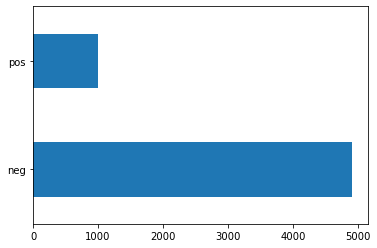

In [9]:
df['class'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

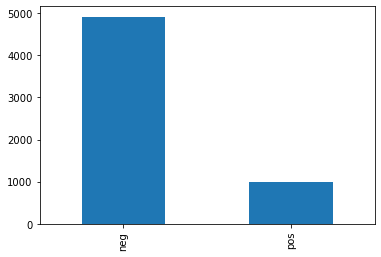

In [10]:
df['class'].value_counts().plot(kind = 'bar')

([<matplotlib.patches.Wedge at 0x1748151d910>,
 [Text(-0.9482122809204211, 0.557578219007605, 'neg'),
  Text(0.948212333124657, -0.5575781302295623, 'pos')],
 [Text(-0.5172066986838659, 0.3041335740041481, '83.1%'),
  Text(0.5172067271589038, -0.3041335255797612, '16.9%')])

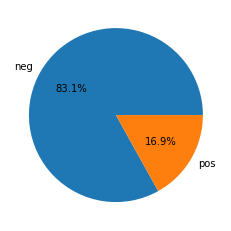

In [11]:
plt.pie(df['class'].value_counts(),autopct='%1.1f%%',labels = ['neg','pos'])

# Handling Missing Values

In [12]:
# As the null values are replaced with na so filling those values with np.nan
df.replace('na',np.NaN, inplace=True)

In [13]:
#Checking the Null values columns
l = []
for i in df.columns:
    if df[i].isnull().sum()>0:
        l.append(i)
print(l)

['ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', '

In [14]:
# Checking the NUll values in each column
for i in l:
    print(str(i) + " : " + str(df[i].isnull().sum()))

ab_000 : 4591
ac_000 : 711
ad_000 : 1801
ae_000 : 518
af_000 : 518
ag_000 : 68
ag_001 : 68
ag_002 : 68
ag_003 : 68
ag_004 : 68
ag_005 : 68
ag_006 : 68
ag_007 : 68
ag_008 : 68
ag_009 : 68
ah_000 : 93
ai_000 : 85
aj_000 : 85
ak_000 : 864
al_000 : 93
am_0 : 85
an_000 : 93
ao_000 : 83
ap_000 : 93
aq_000 : 83
ar_000 : 573
as_000 : 85
at_000 : 85
au_000 : 85
av_000 : 518
ax_000 : 518
ay_000 : 69
ay_001 : 69
ay_002 : 69
ay_003 : 69
ay_004 : 69
ay_005 : 69
ay_006 : 69
ay_007 : 69
ay_008 : 69
ay_009 : 69
az_000 : 69
az_001 : 69
az_002 : 69
az_003 : 69
az_004 : 69
az_005 : 69
az_006 : 69
az_007 : 69
az_008 : 69
az_009 : 69
ba_000 : 70
ba_001 : 70
ba_002 : 70
ba_003 : 70
ba_004 : 70
ba_005 : 70
ba_006 : 70
ba_007 : 70
ba_008 : 70
ba_009 : 70
bb_000 : 93
bc_000 : 573
bd_000 : 573
be_000 : 518
bf_000 : 518
bg_000 : 93
bh_000 : 93
bi_000 : 83
bj_000 : 83
bk_000 : 1921
bl_000 : 2277
bm_000 : 3319
bn_000 : 3717
bo_000 : 3934
bp_000 : 4064
bq_000 : 4139
br_000 : 4189
bs_000 : 104
bt_000 : 25
bu_000 : 9

In [15]:
#Finding the mean of the missing/NULL values
for i in l:
    print(str(i) + " : " + str(df[i].isnull().sum()/len(df[i])))

ab_000 : 0.776818950930626
ac_000 : 0.12030456852791878
ad_000 : 0.3047377326565144
ae_000 : 0.08764805414551607
af_000 : 0.08764805414551607
ag_000 : 0.011505922165820644
ag_001 : 0.011505922165820644
ag_002 : 0.011505922165820644
ag_003 : 0.011505922165820644
ag_004 : 0.011505922165820644
ag_005 : 0.011505922165820644
ag_006 : 0.011505922165820644
ag_007 : 0.011505922165820644
ag_008 : 0.011505922165820644
ag_009 : 0.011505922165820644
ah_000 : 0.015736040609137057
ai_000 : 0.014382402707275803
aj_000 : 0.014382402707275803
ak_000 : 0.14619289340101524
al_000 : 0.015736040609137057
am_0 : 0.014382402707275803
an_000 : 0.015736040609137057
ao_000 : 0.01404399323181049
ap_000 : 0.015736040609137057
aq_000 : 0.01404399323181049
ar_000 : 0.09695431472081219
as_000 : 0.014382402707275803
at_000 : 0.014382402707275803
au_000 : 0.014382402707275803
av_000 : 0.08764805414551607
ax_000 : 0.08764805414551607
ay_000 : 0.011675126903553299
ay_001 : 0.011675126903553299
ay_002 : 0.011675126903553

In [16]:
# drop if more than 60% of the values arr missing for a column
df = df[df.columns[df.isnull().mean() < 0.6]] 

In [17]:
df.shape

(5910, 164)

In [18]:
#Analyzing the output class
df['class'].unique()

array(['neg', 'pos'], dtype=object)

In [19]:
df['class'] = df['class'].replace({'neg':0,'pos':1})

In [20]:
df['class'].unique()

array([0, 1], dtype=int64)

Based on the above plot we can see that the dataset is highly imbalanced

In [21]:
# we need to convert all the data to numeric format
df=df.apply(pd.to_numeric)

In [22]:
df.dtypes

class       int64
aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 164, dtype: object

<AxesSubplot:>

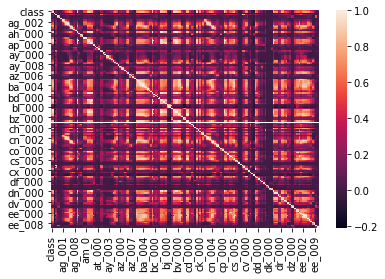

In [23]:
import seaborn as sns
sns.heatmap(df.corr())

In [24]:
#replacing the nan values with median() 
for col in df.columns:
    df[col] = df[col].replace(np.NaN,df[col].median())

In [25]:
#checking the columns which had a standard deviation of 0 which were not useful for our analysis
cols_to_drop = []
for i in df.columns:
    if df[i].std() == 0:
        cols_to_drop.append(i)

In [26]:
cols_to_drop

['cd_000']

In [27]:
df.drop('cd_000',axis = 1,inplace = True)

In [28]:
df.shape

(5910, 163)

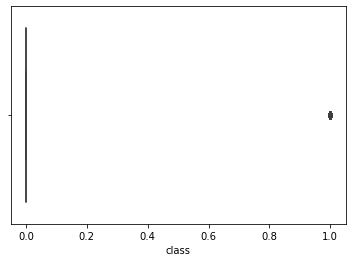

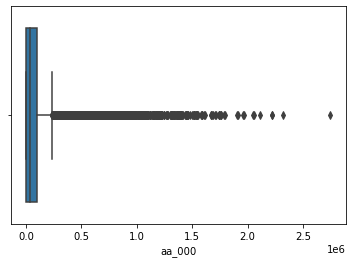

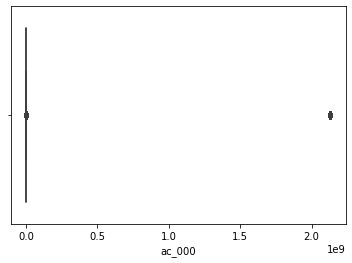

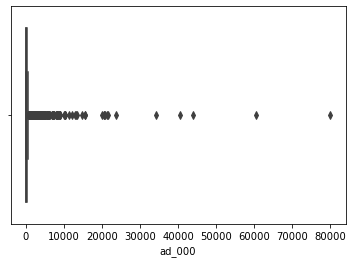

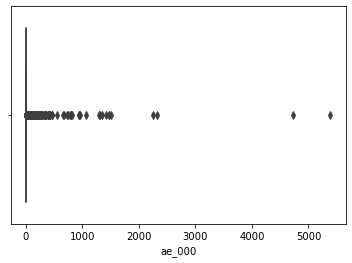

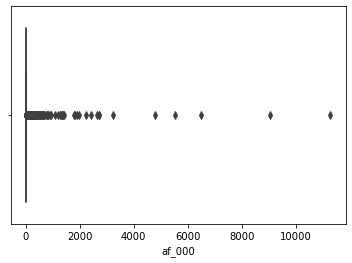

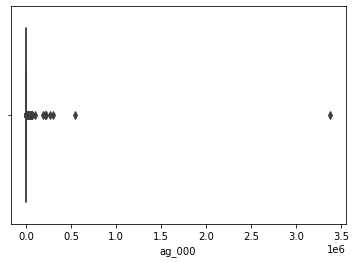

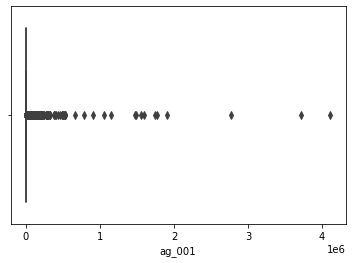

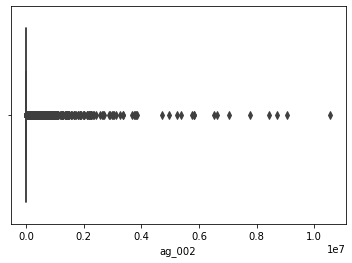

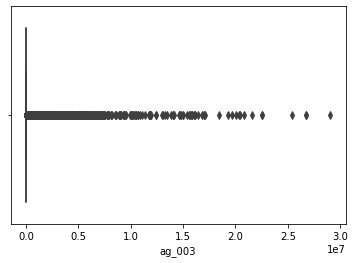

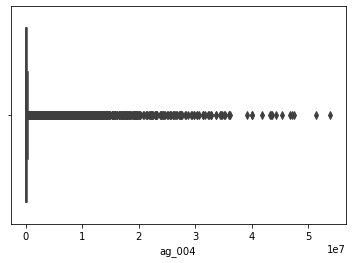

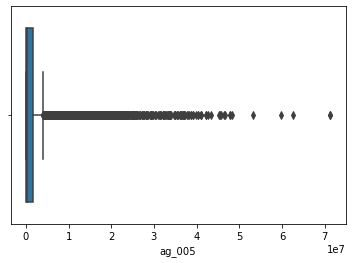

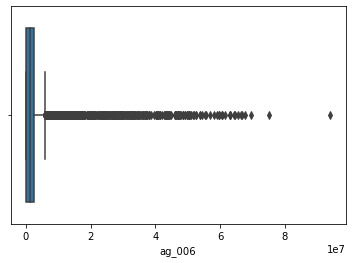

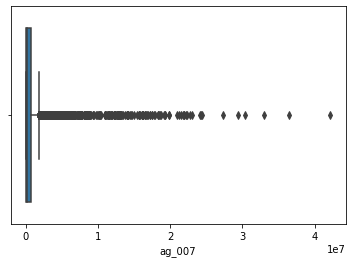

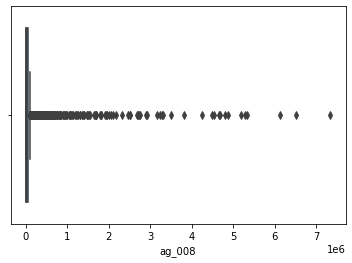

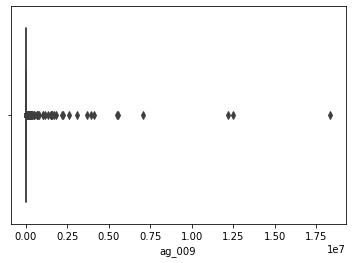

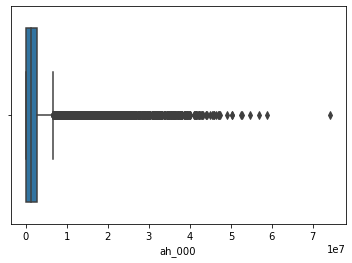

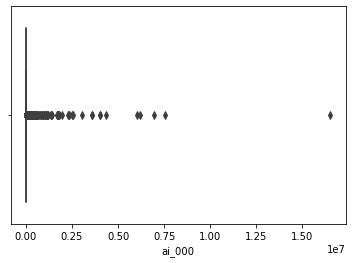

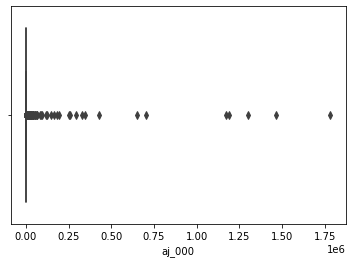

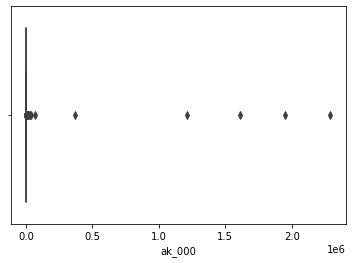

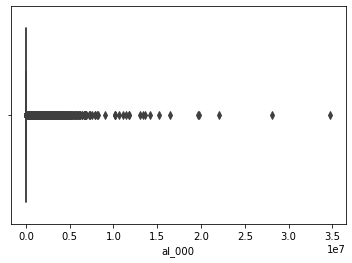

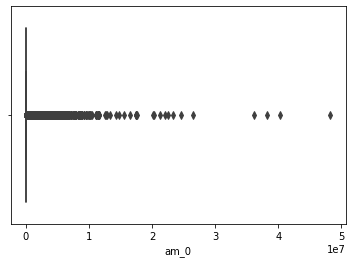

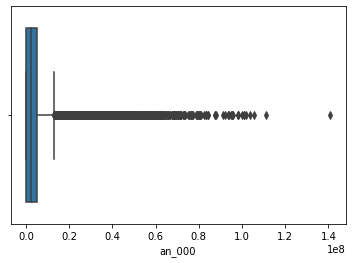

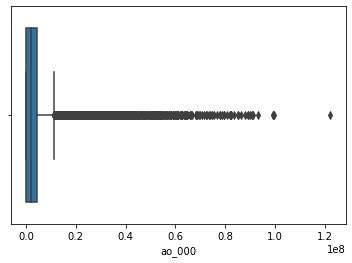

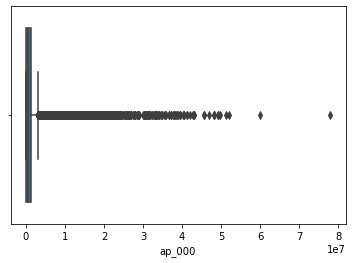

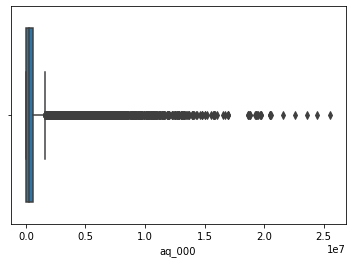

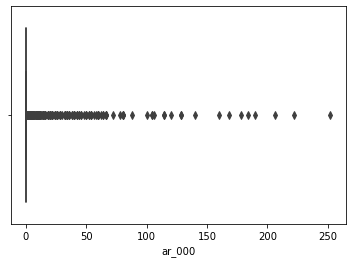

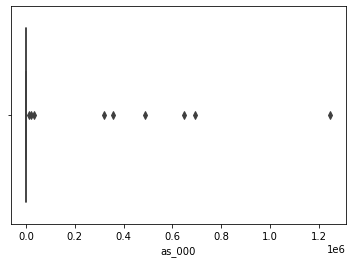

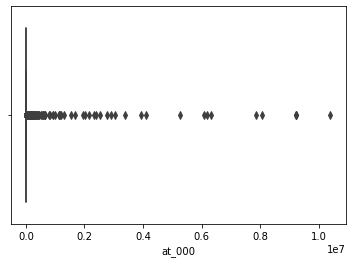

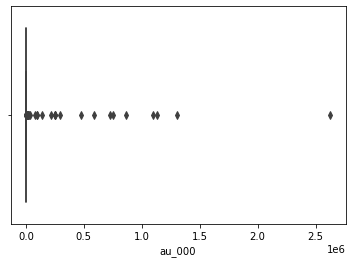

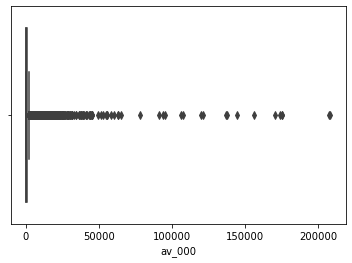

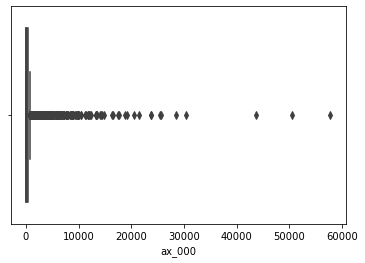

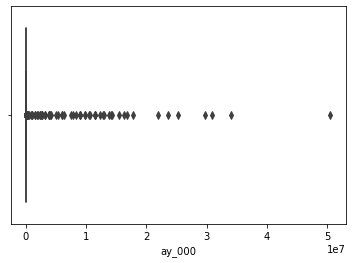

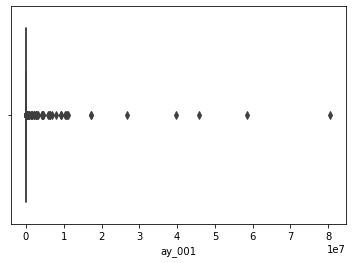

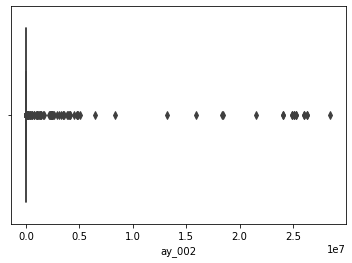

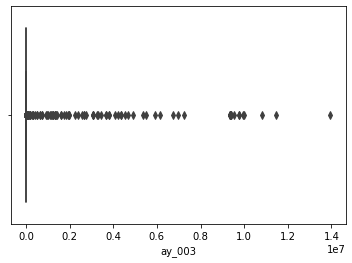

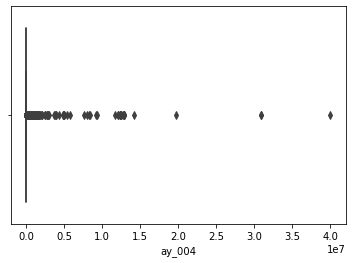

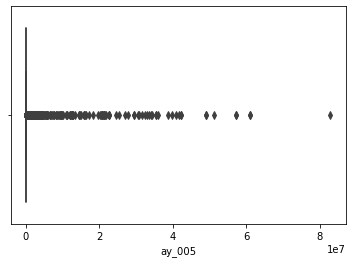

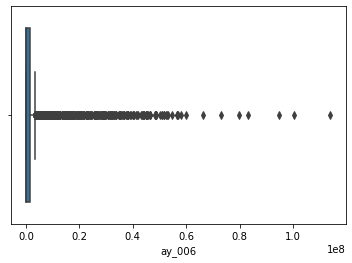

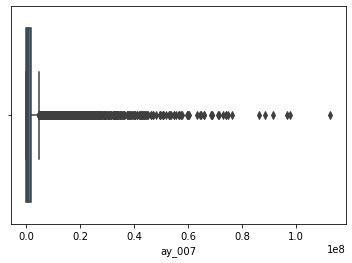

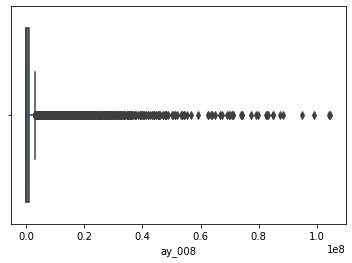

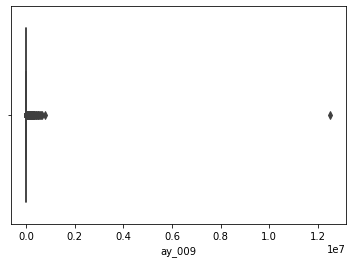

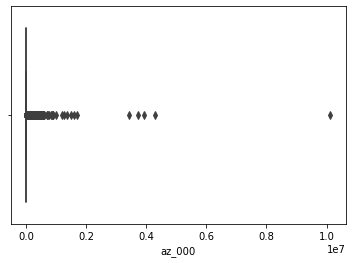

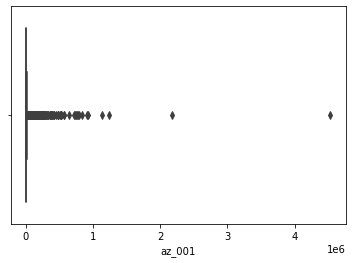

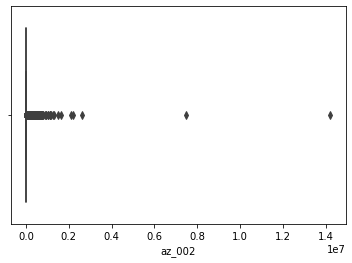

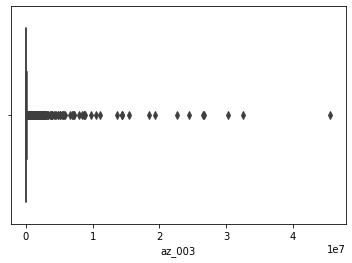

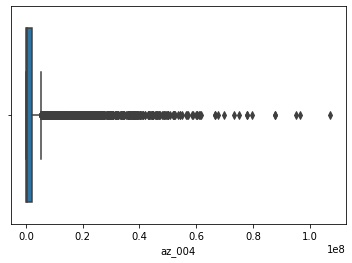

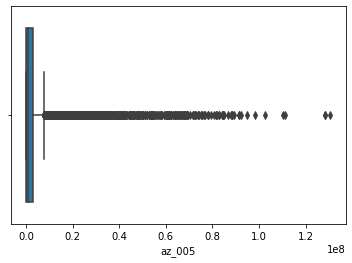

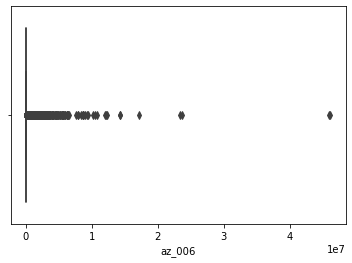

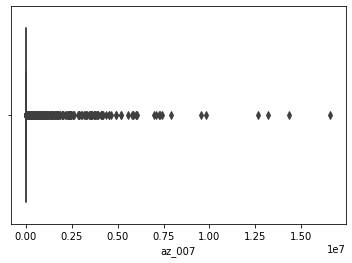

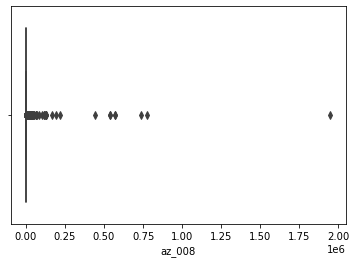

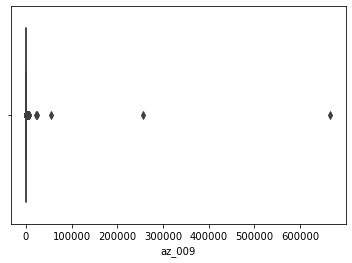

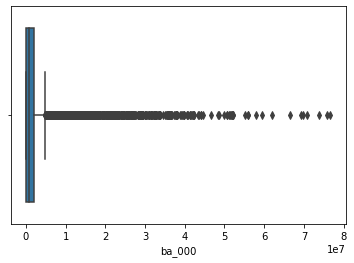

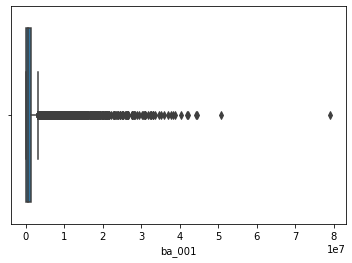

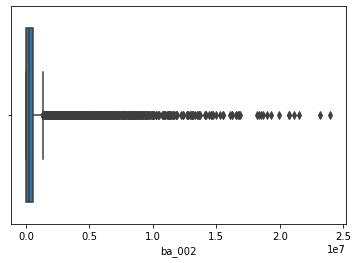

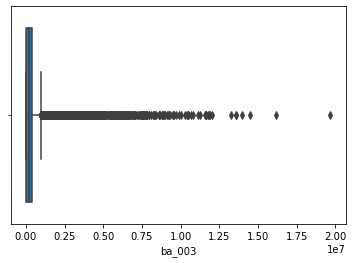

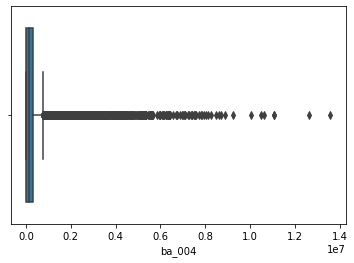

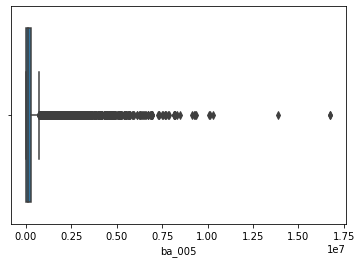

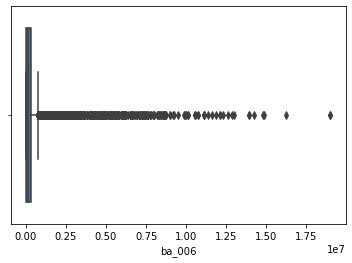

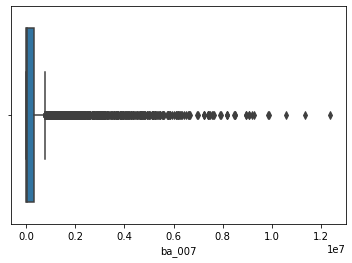

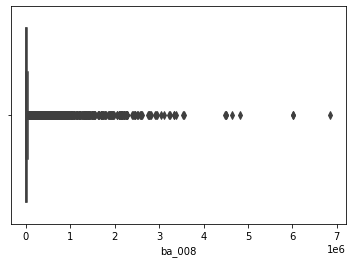

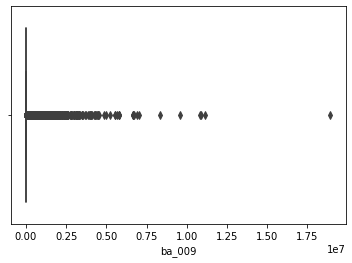

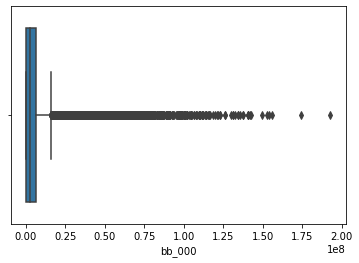

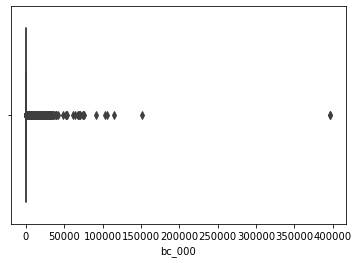

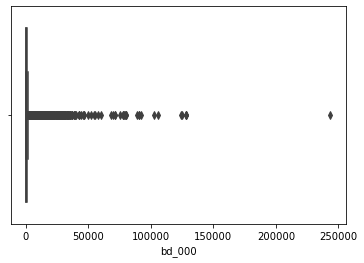

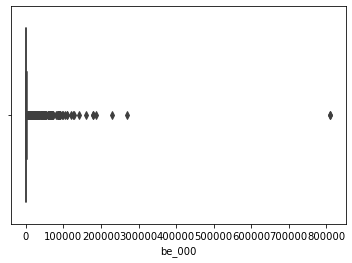

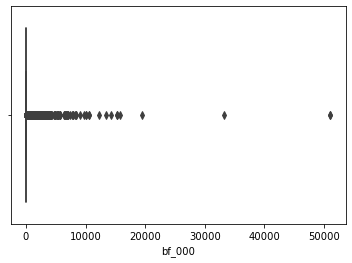

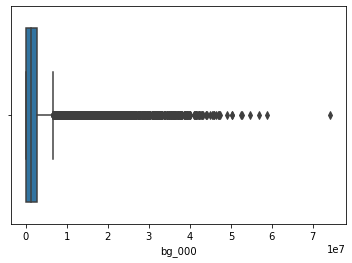

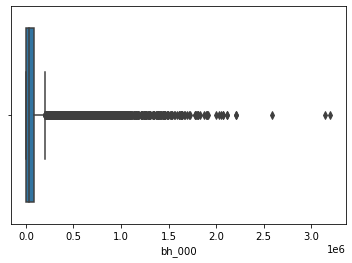

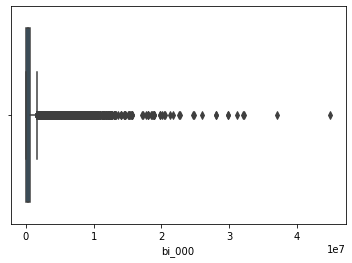

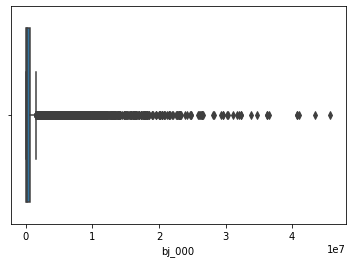

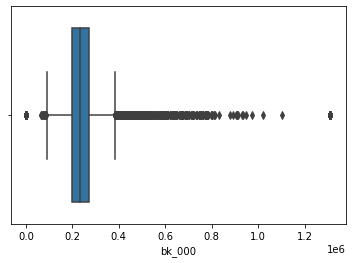

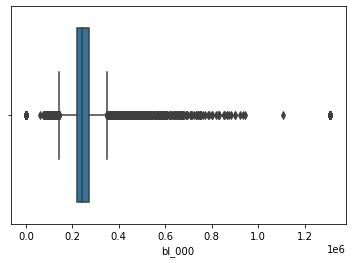

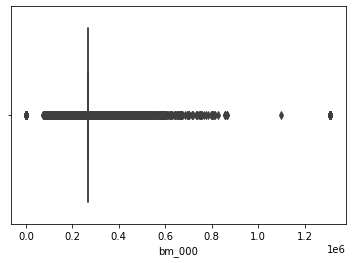

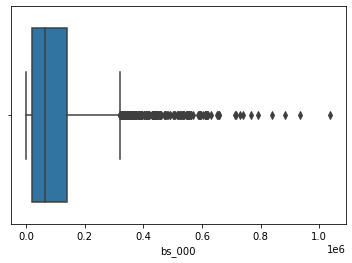

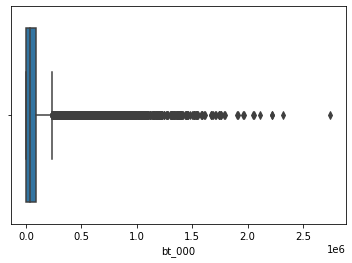

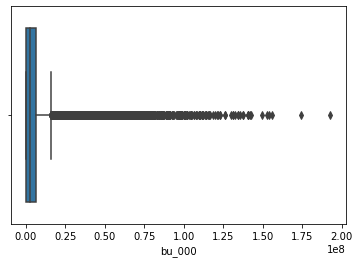

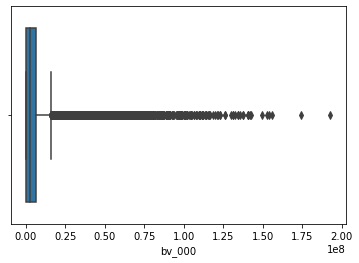

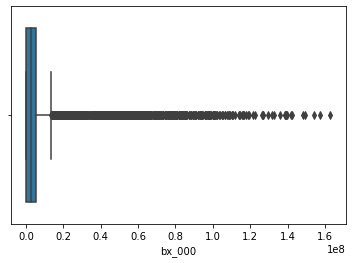

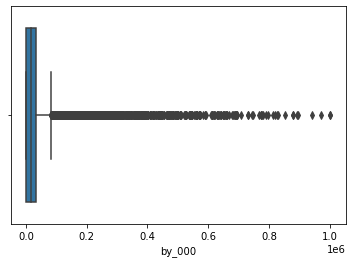

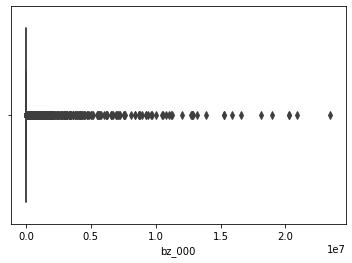

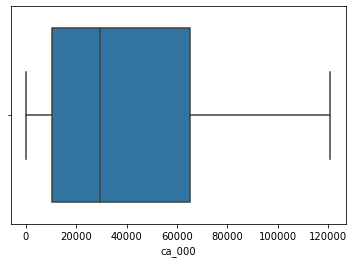

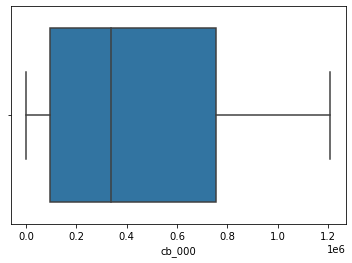

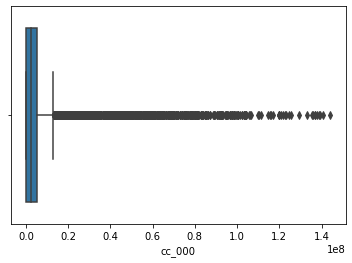

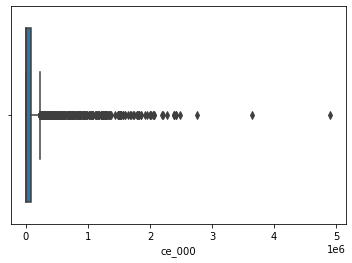

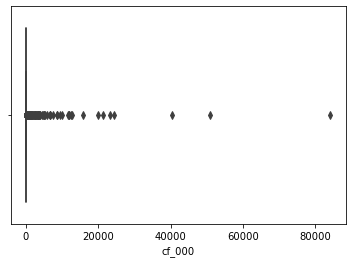

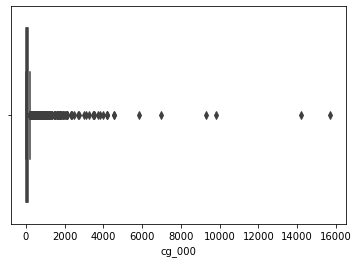

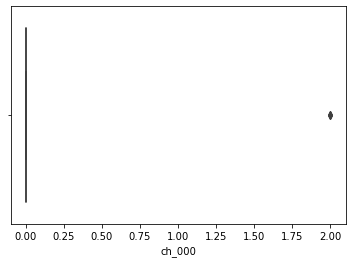

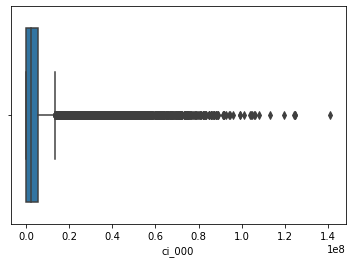

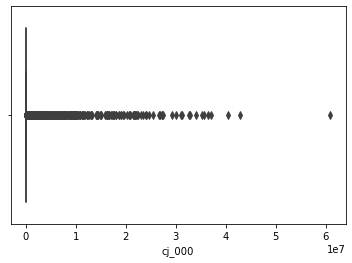

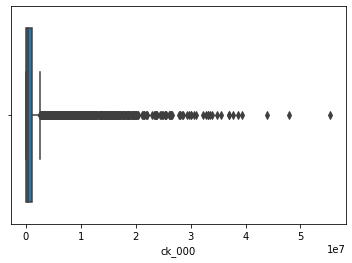

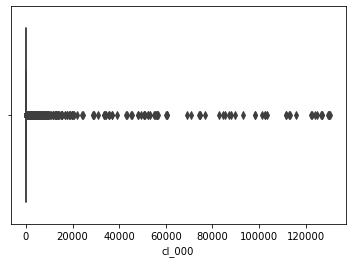

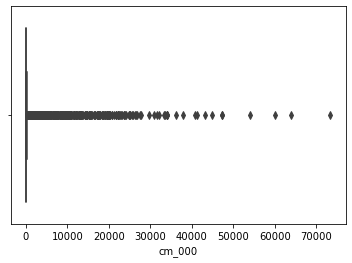

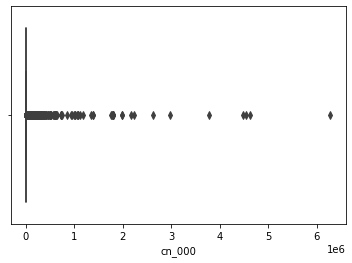

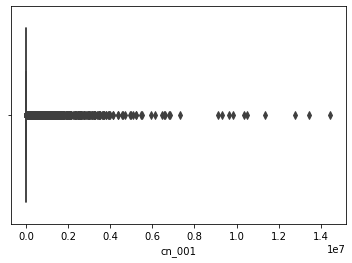

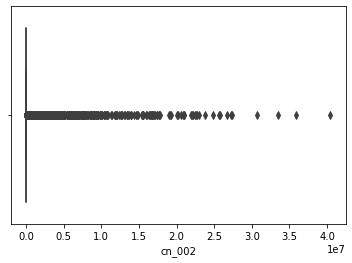

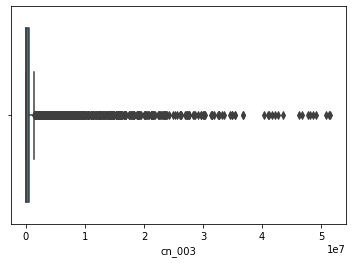

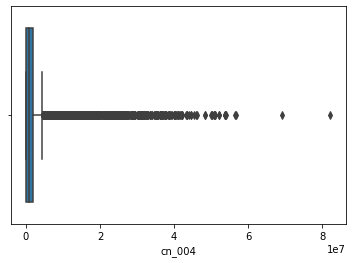

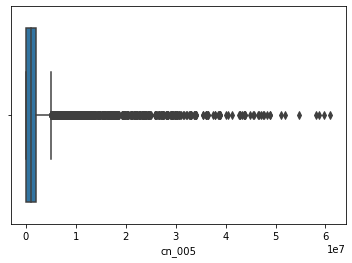

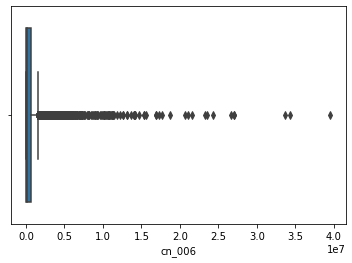

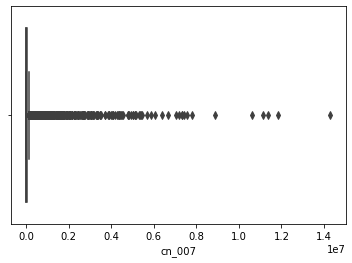

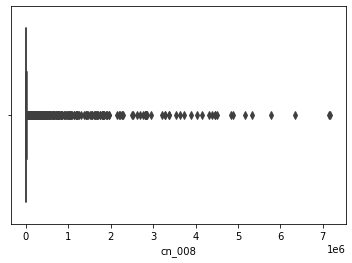

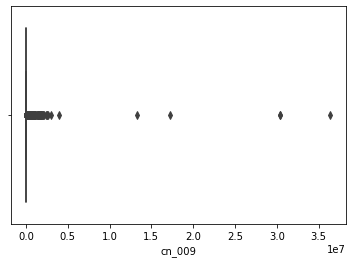

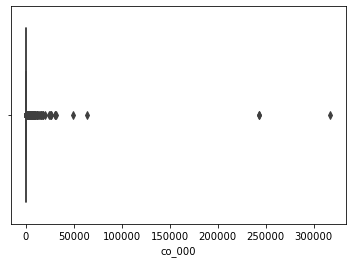

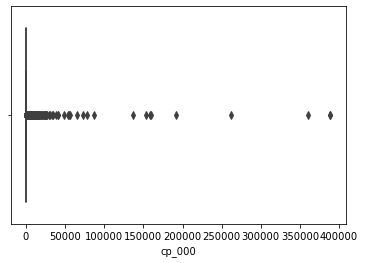

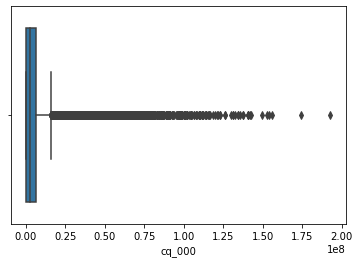

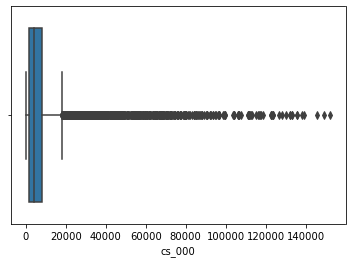

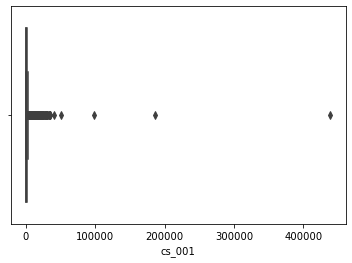

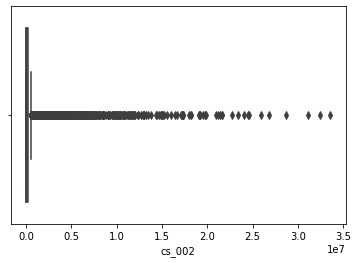

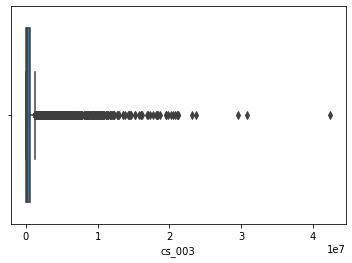

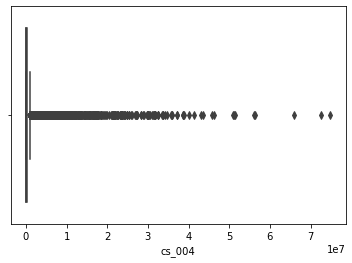

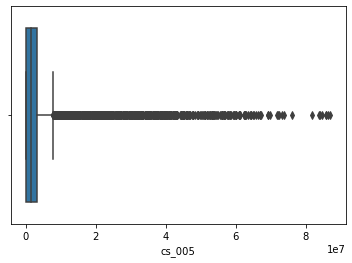

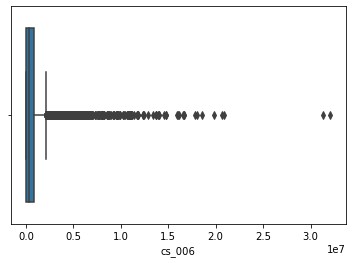

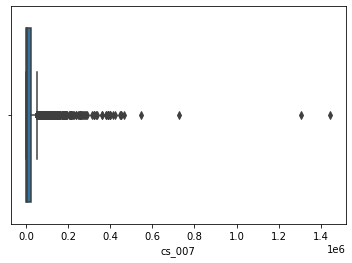

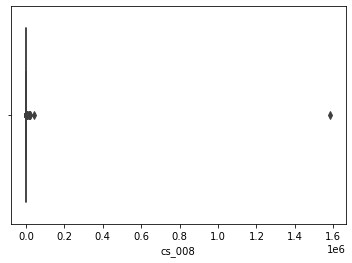

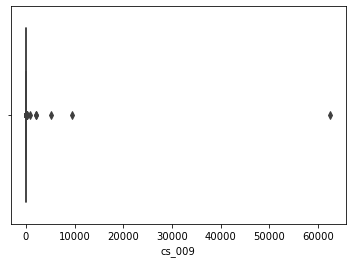

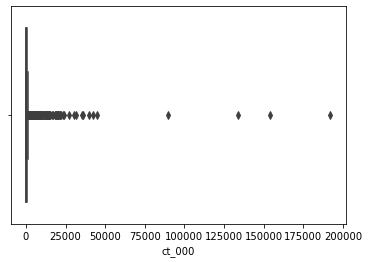

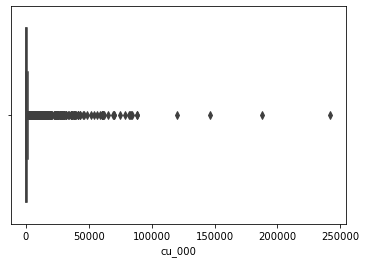

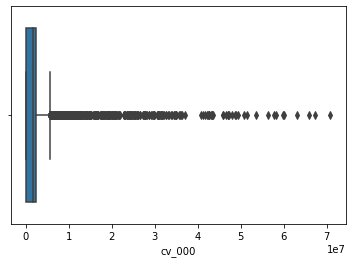

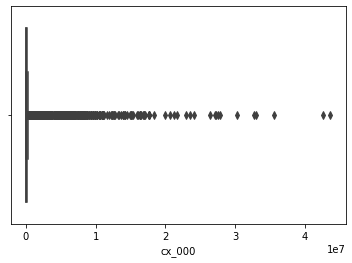

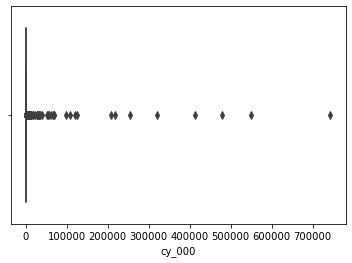

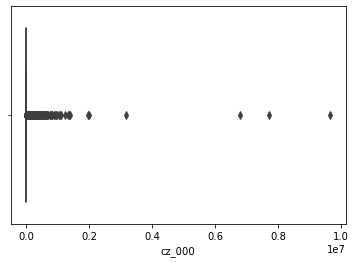

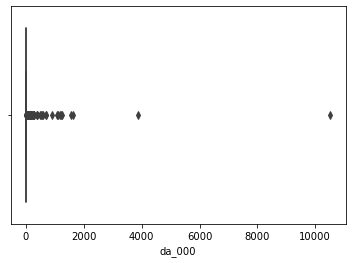

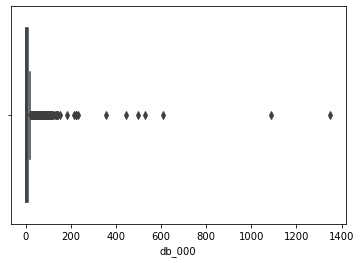

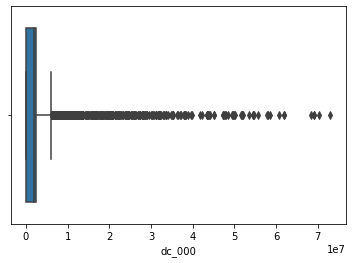

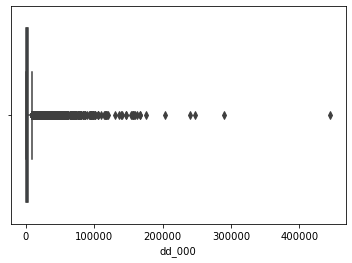

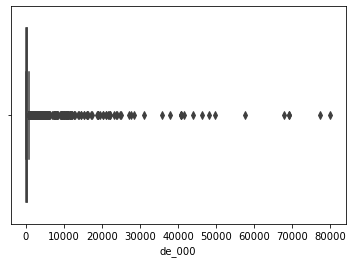

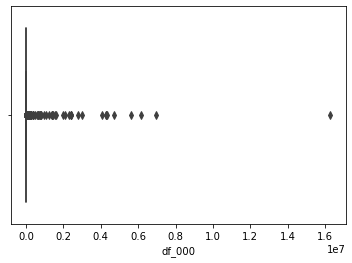

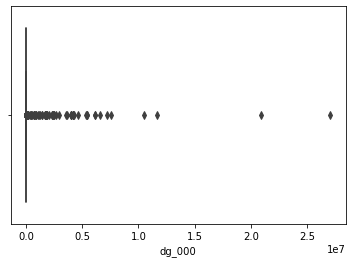

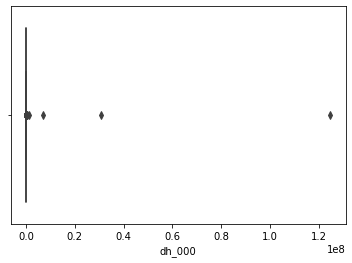

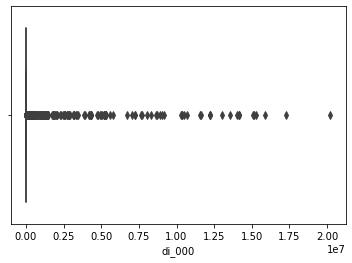

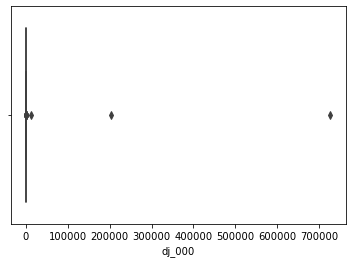

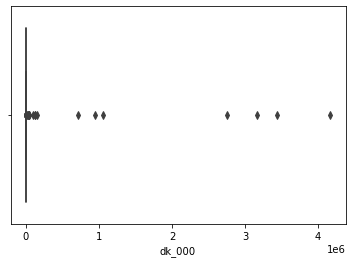

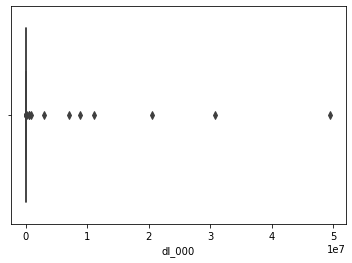

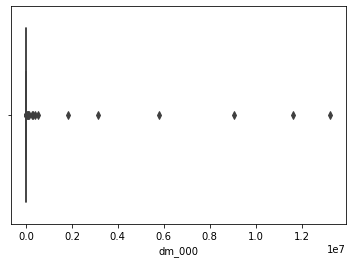

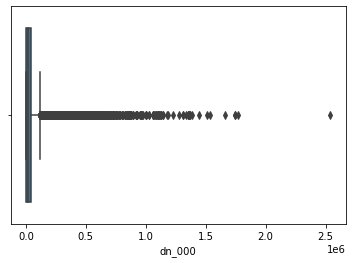

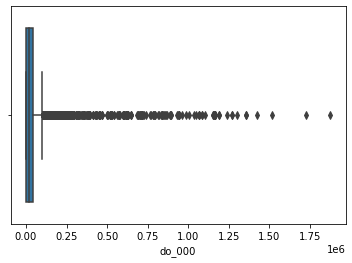

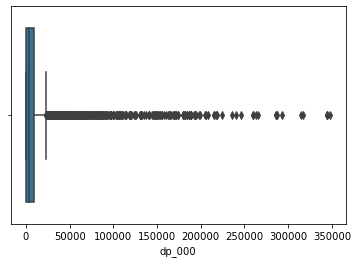

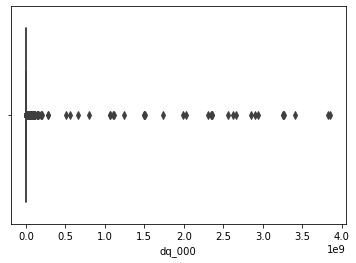

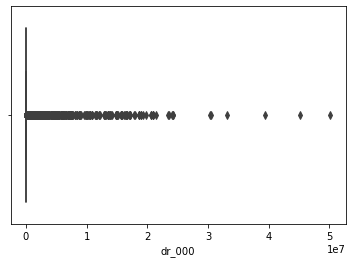

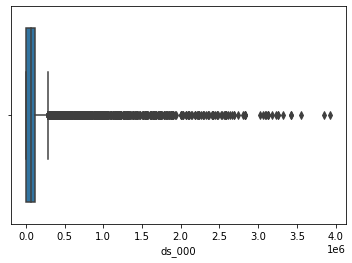

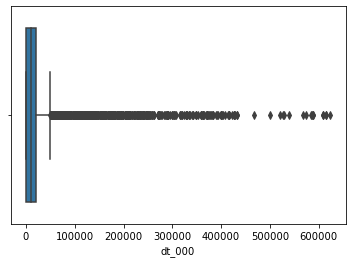

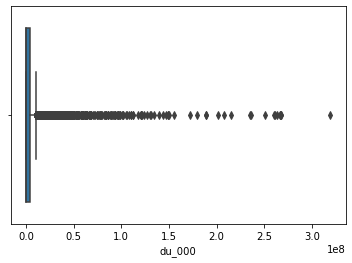

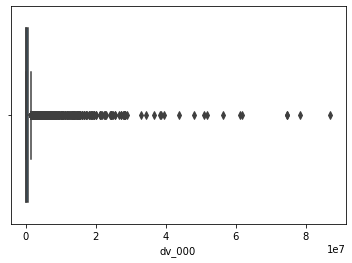

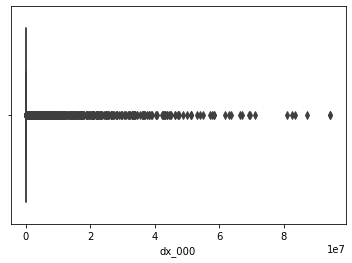

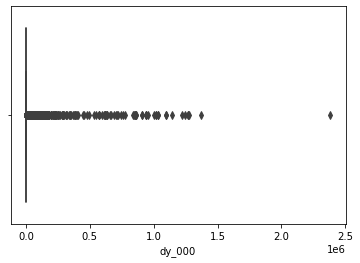

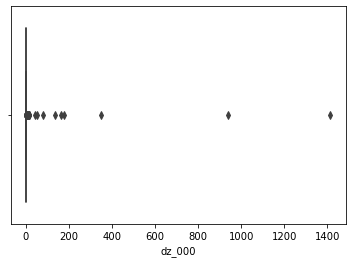

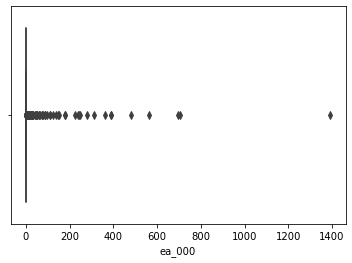

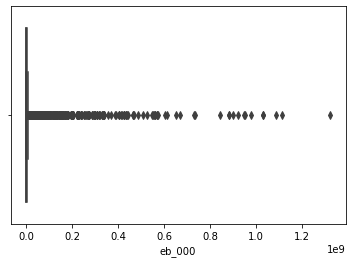

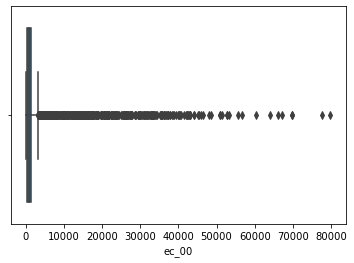

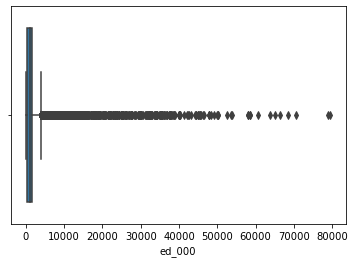

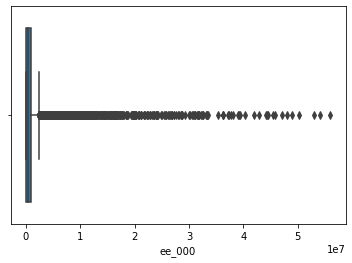

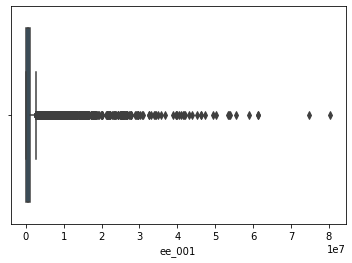

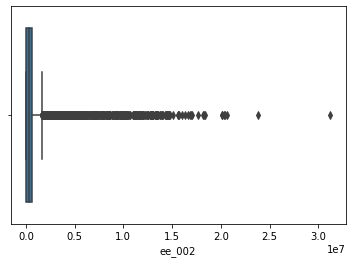

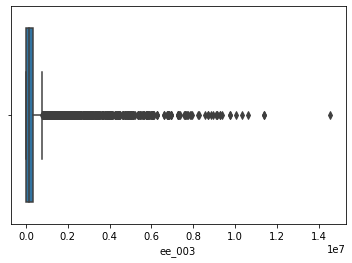

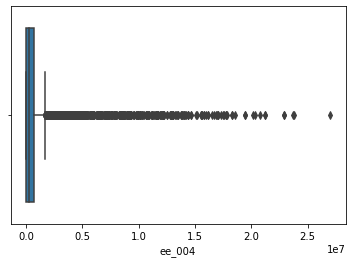

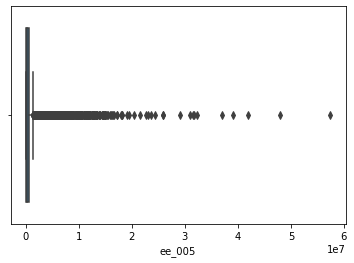

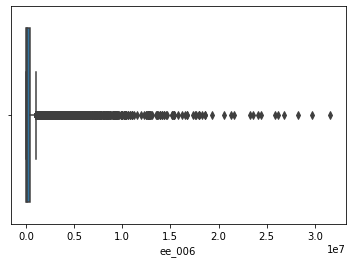

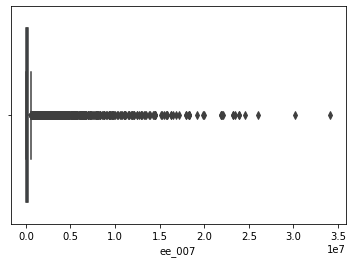

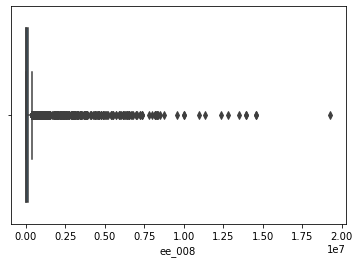

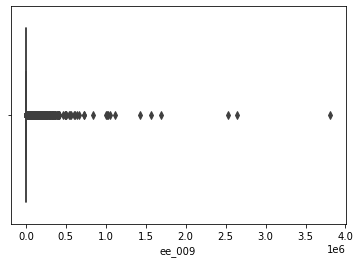

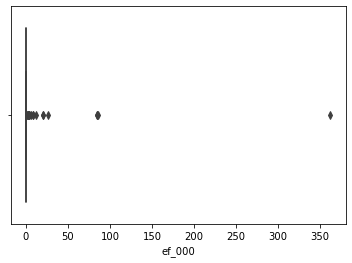

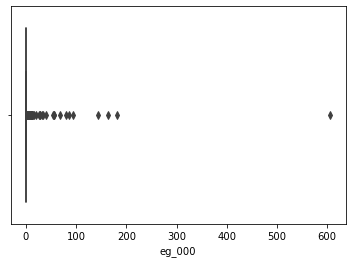

In [29]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [33]:
# Splitting the input and target features

X = df.drop(['class'],axis = 1)
y = df['class']

<AxesSubplot:xlabel='class', ylabel='count'>

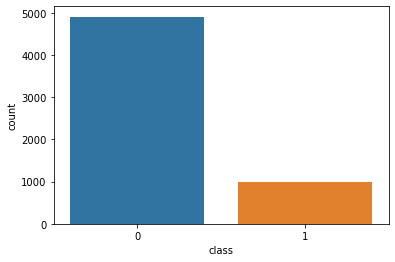

In [34]:
import seaborn as sns
sns.countplot(y)

In [35]:
# Handling the Imbalanced Dataset using SMOTE
from imblearn.over_sampling import SMOTE

In [36]:
sample = SMOTE()
X_bal,y_bal = sample.fit_resample(X,y)

<AxesSubplot:xlabel='class', ylabel='count'>

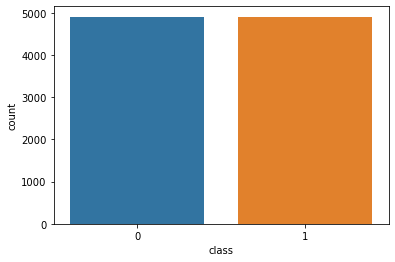

In [37]:
sns.countplot(y_bal)

In [38]:
# Applying the Standard Scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns,index=X.index)

In [40]:
X_scaled.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.246391,2.542070,-0.092906,-0.071889,-0.064923,-0.023344,-0.082359,-0.156393,-0.235599,-0.298132,...,0.076197,0.006165,-0.121946,-0.198780,-0.214523,-0.223135,-0.190798,-0.152960,-0.025886,-0.037643
1,-0.389639,-0.393381,-0.159686,-0.071889,-0.064923,-0.023344,-0.082359,-0.156393,-0.235599,-0.302145,...,-0.260398,-0.266565,-0.297368,-0.277788,-0.301261,-0.258840,-0.166172,-0.137258,-0.025886,-0.037643
2,-0.363438,-0.393381,-0.183969,-0.071889,-0.064923,-0.023344,-0.082359,-0.156393,-0.235599,-0.305653,...,-0.319580,-0.282352,-0.243771,-0.219988,-0.222294,-0.223104,-0.168647,-0.147580,-0.025886,-0.037643
3,-0.498113,-0.393381,-0.201170,-0.071889,-0.025772,-0.023344,-0.082359,-0.156393,-0.235441,-0.305534,...,-0.433462,-0.420539,-0.417633,-0.364190,-0.357669,-0.296555,-0.264849,-0.152960,0.756664,3.469296
4,-0.298333,-0.393379,-0.002855,-0.071889,-0.064923,-0.023344,-0.082359,-0.156393,-0.235599,-0.296759,...,-0.177962,-0.221826,-0.251438,-0.241952,-0.236556,-0.151738,0.174003,-0.140210,-0.025886,-0.037643


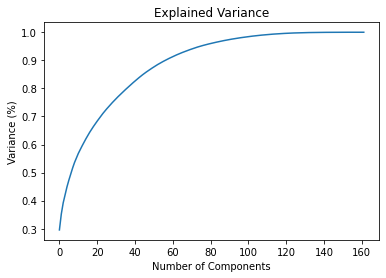

In [41]:
#Applying the PCA for Feature selection
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

Observation:

More than 90% of the data is explained by 80 features

In [42]:
pca = PCA(n_components=100)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,index=X_scaled.index)
principal_x

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.956507,-0.587999,-0.893058,0.773001,-0.511930,-0.427991,0.097645,-0.580294,-0.281389,0.009767,...,0.551751,0.314934,-0.187671,0.303433,-0.313011,0.390804,0.109181,0.187907,-0.430259,-0.381685
1,-2.456046,-0.377180,0.109822,-0.124251,-0.098634,-0.063797,0.112654,0.199431,0.037322,-0.494933,...,-0.071191,-0.060841,-0.037920,0.021591,0.082108,-0.090649,-0.159442,0.032895,0.086496,-0.181942
2,-2.790831,-0.208843,0.287683,-0.222176,-0.340649,0.159020,-0.224993,-0.106419,-0.168537,0.486829,...,0.001820,0.040162,-0.017491,0.054107,-0.026570,-0.003993,-0.048421,0.029576,-0.011385,-0.021616
3,-3.763061,-0.040593,0.588418,-0.350907,-0.008200,0.328728,-0.087235,0.170341,0.730023,0.103681,...,0.112424,0.083615,-0.030088,-0.065458,0.055049,0.046315,-0.031575,0.001615,0.051455,-0.052512
4,-1.916253,-0.087754,-0.413458,0.113851,-0.071320,-0.061019,-0.072661,-0.358821,-0.228568,0.008919,...,0.040829,0.036455,-0.002129,0.078864,-0.102275,0.049776,-0.049661,0.040947,0.145083,0.027593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,18.108825,-9.348800,3.425941,2.508330,-0.352280,-3.981122,-1.420539,-0.211031,1.421244,1.443291,...,0.398429,-1.227386,0.254170,0.275064,-1.473762,0.553562,1.749511,0.263660,-0.734627,0.014230
5906,15.365867,4.640637,7.238354,-3.570342,-1.041946,-1.248804,0.369784,0.808631,0.027624,0.268198,...,0.189760,-0.986375,-2.205172,0.121708,0.133412,-0.501175,0.904493,1.651816,-1.092288,0.251340
5907,16.183449,-2.284566,-7.146405,2.732824,8.232147,6.419788,8.599807,5.094423,4.101114,-5.030872,...,-1.008219,-0.882939,-1.989554,-0.572068,1.098858,-1.458555,-0.726638,1.408436,1.132624,-0.484520
5908,13.045923,3.233491,6.436156,-2.468485,1.742134,0.452331,0.706164,0.548924,0.080247,3.217954,...,-0.222633,1.523777,-0.490055,2.496441,1.240416,-0.961738,0.858444,3.347506,1.690023,0.796710


In [54]:
#Splitting the data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 1/3,random_state = 0)

In [55]:
# Function for calculating all the relevant metrics 
def score(m):
    y_pred = m.predict(x_test)
    print(classification_report(y_pred,y_test))
    print(confusion_matrix(y_pred,y_test))
    print("ROC-AUC Score" + " : "+ str(roc_auc_score(y_pred,y_test)))
    print(plot_roc_curve(m, x_test, y_test))

# Applying Logistic Regression

In [56]:
from sklearn.metrics  import roc_auc_score,accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import plot_roc_curve

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1669
           1       0.84      0.90      0.87       301

    accuracy                           0.96      1970
   macro avg       0.91      0.93      0.92      1970
weighted avg       0.96      0.96      0.96      1970

[[1617   52]
 [  31  270]]
ROC-AUC Score : 0.9329267928554508


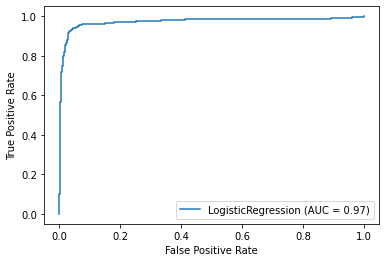

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
score(lr)

# Building a KNN Classifier

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1676
           1       0.83      0.90      0.86       294

    accuracy                           0.96      1970
   macro avg       0.90      0.94      0.92      1970
weighted avg       0.96      0.96      0.96      1970

[[1620   56]
 [  28  266]]
ROC-AUC Score : 0.9356745084668712


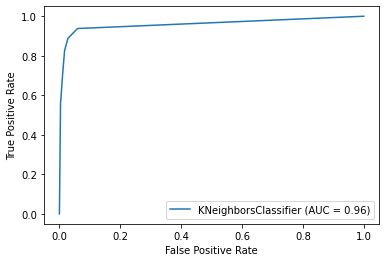

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
score(knn)

# Building a SVM Classifier

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1665
           1       0.85      0.90      0.87       305

    accuracy                           0.96      1970
   macro avg       0.91      0.93      0.92      1970
weighted avg       0.96      0.96      0.96      1970

[[1616   49]
 [  32  273]]
ROC-AUC Score : 0.9328262688918426


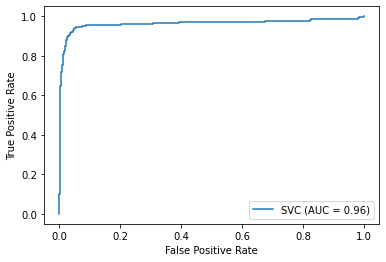

In [65]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(x_train,y_train)
score(clf)

# Decision tree classifier

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1648
           1       0.81      0.81      0.81       322

    accuracy                           0.94      1970
   macro avg       0.89      0.89      0.89      1970
weighted avg       0.94      0.94      0.94      1970

[[1588   60]
 [  60  262]]
ROC-AUC Score : 0.8886284146415002


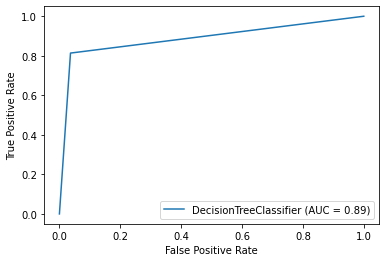

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
score(dt)

# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1618
           1       0.90      0.82      0.86       352

    accuracy                           0.95      1970
   macro avg       0.93      0.90      0.91      1970
weighted avg       0.95      0.95      0.95      1970

[[1585   33]
 [  63  289]]
ROC-AUC Score : 0.9003135886054613


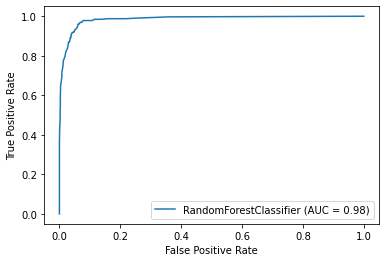

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
score(rf)

# Applying XGBoost

[23:34:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1644
           1       0.88      0.87      0.87       326

    accuracy                           0.96      1970
   macro avg       0.92      0.92      0.92      1970
weighted avg       0.96      0.96      0.96      1970

[[1604   40]
 [  44  282]]
ROC-AUC Score : 0.9203498873016585


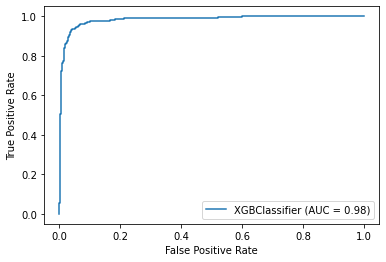

In [68]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
score(xgb)

# Applying Light GBM

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1638
           1       0.89      0.87      0.88       332

    accuracy                           0.96      1970
   macro avg       0.93      0.92      0.93      1970
weighted avg       0.96      0.96      0.96      1970

[[1604   34]
 [  44  288]]
ROC-AUC Score : 0.9233564293805259


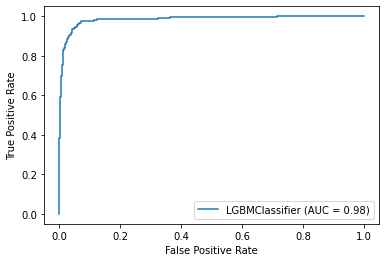

In [69]:

from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
score(lgb)

# Hyper parameter Tuning using RandomizedSearchCV

In [70]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV,KFold,RepeatedKFold,RepeatedStratifiedKFold
def randomcv(model,params):
# Random search of parameters, using 3 fold cross validation,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    gs1 = RandomizedSearchCV(model, params,n_iter = 2, cv = cv, n_jobs = 6,verbose = 2, random_state = 42)
# search across 100 different combinations, and use all available cores
    gs1.fit(x_train,y_train)  
# print best parameters
    print(gs1.best_estimator_)

# Logistic Regression

In [71]:
%%time
from scipy.stats import loguniform
# create logistic regressor parameters dict for tunning
lg_param_grid = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
}

# passing data for hyper parameter tunning with Randomized search cv
randomcv(lr,lg_param_grid)

Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


LogisticRegression(C=0.0001, solver='liblinear')
Wall time: 7.66 s


[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    7.3s finished


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1576
           1       0.93      0.76      0.84       394

    accuracy                           0.94      1970
   macro avg       0.94      0.87      0.90      1970
weighted avg       0.94      0.94      0.94      1970

[[1553   23]
 [  95  299]]
ROC-AUC Score : 0.8721446700507615


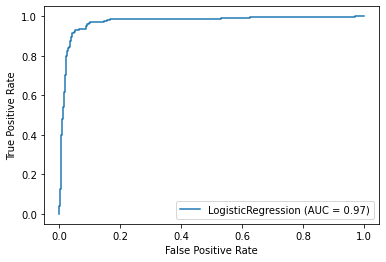

In [72]:
lr1 = LogisticRegression(C=0.0001, solver='liblinear')
lr1.fit(x_train,y_train)
score(lr1)

# KNN

In [73]:
# create KNN classifier parameters dict for tunning
knn_param = {
    'leaf_size': [x for x in range(1,100)],
    'n_neighbors': [x for x in range(1,100)],
    'p': [1,2]
}
# passing data for hyper parameter tunning with Randomized search cv
randomcv(knn,knn_param)

Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    9.4s finished


KNeighborsClassifier(leaf_size=80, n_neighbors=77)


              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1700
           1       0.76      0.90      0.82       270

    accuracy                           0.95      1970
   macro avg       0.87      0.93      0.90      1970
weighted avg       0.95      0.95      0.95      1970

[[1622   78]
 [  26  244]]
ROC-AUC Score : 0.9289106753812636


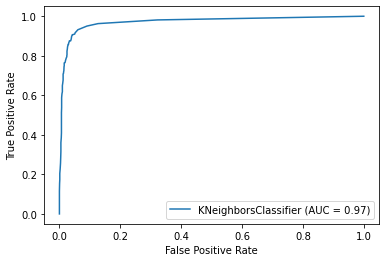

In [74]:
knn1 = KNeighborsClassifier(leaf_size=80, n_neighbors=77)
knn1.fit(x_train,y_train)
score(knn1)

# Decision Tree

In [75]:
# create DecisionTree classifier parameters dict for tunning
dt_param = {'max_depth':range(5,16,2), 
               'min_samples_split':range(200,1001,200),
               'min_samples_leaf': [x for x in range(1,50)],
               
               'max_features':range(0,20,2)
              }

# passing data for hyper parameter tunning with Randomized search cv
randomcv(dt,dt_param)

Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


DecisionTreeClassifier(max_depth=9, max_features=18, min_samples_leaf=34,
                       min_samples_split=200)


[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    0.6s finished


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1581
           1       0.91      0.75      0.82       389

    accuracy                           0.94      1970
   macro avg       0.92      0.87      0.89      1970
weighted avg       0.93      0.94      0.93      1970

[[1551   30]
 [  97  292]]
ROC-AUC Score : 0.8658336707267698


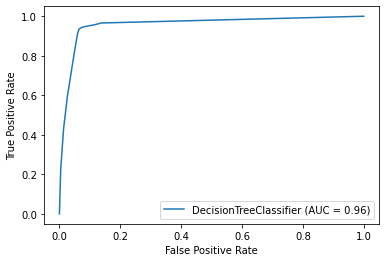

In [76]:
dt1 = DecisionTreeClassifier(max_depth=9, max_features=18, min_samples_leaf=34,
                       min_samples_split=200)
dt1.fit(x_train,y_train)
score(dt1)

# Random Forest

In [77]:
# create RandomForest classifier parameters dict for tunning
rf_param_grid = {
    'max_depth' : [x for x in range(1,50)],
    'min_samples_split': [x for x in range(1,50)],
    'min_samples_leaf': [x for x in range(1,50)],
    'n_estimators': [x for x in range(1,100)],
    'max_features': ['sqrt', 'log2',None,'auto']
}

# passing data for hyper parameter tunning with Randomized search cv
randomcv(rf,rf_param_grid)

Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:   19.0s finished


RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_split=40,
                       n_estimators=88)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1625
           1       0.88      0.82      0.85       345

    accuracy                           0.95      1970
   macro avg       0.92      0.90      0.91      1970
weighted avg       0.95      0.95      0.95      1970

[[1587   38]
 [  61  284]]
ROC-AUC Score : 0.8999018952062431


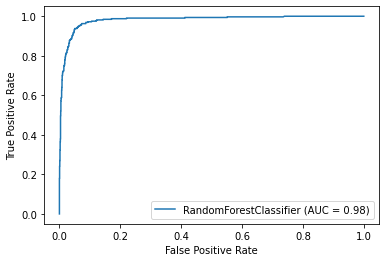

In [78]:
rf1 = RandomForestClassifier(max_depth=23, max_features='sqrt', min_samples_leaf=34,
                       min_samples_split=43, n_estimators=36)
rf1.fit(x_train,y_train)
score(rf1)

# XGB

In [ ]:
%%time
# create GradientBoost classifier parameters dict for tunning
gb_param = {'max_depth':range(5,16,2), 
               'n_estimators': [x for x in range(1,100)],
               'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]
              }

# passing data for hyper parameter tunning with Randomized search cv
randomcv(xgb,gb_param)

Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


In [ ]:
xgb1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=90, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb1.fit(x_train,y_train)
score(xgb1)

# Conclusion

SVM has given a better Accuracy of 97% and better F1 score,ROC AUC score as well

In [ ]:
import pickle
pickle.dump(clf,open('svm_model.pkl','wb'))

In [ ]:
pickle.dump(scaler,open('scalar.pkl','wb'))

In [ ]:
pickle.dump(pca,open('pca.pkl','wb'))